In [1]:
import control.matlab as ct
s = ct.tf([1,0],[1])

In [2]:
import matplotlib.pyplot as plt

In [3]:
G = 1/(s+1)

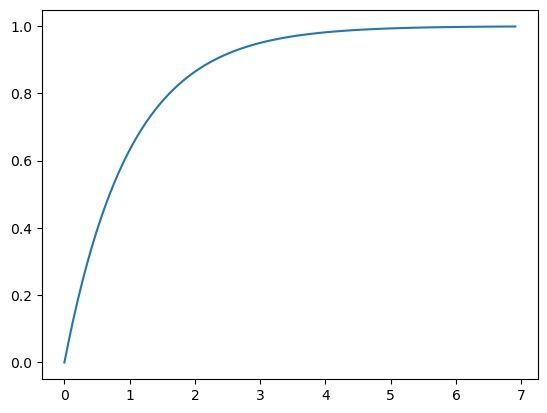

In [4]:
r1, T = ct.step(G)
plt.plot(T, r1)
plt.show()

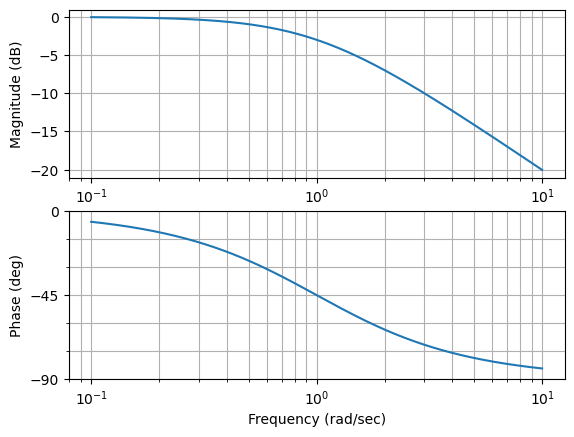

In [5]:
ct.bode(G)
plt.show()

In [6]:
ct.margin(G)

(inf, inf, nan, nan)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2023-12-12 13:46:12.596094: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 13:46:12.596208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 13:46:12.597294: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-12 13:46:12.603841: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [6]:
len(train_images)

50000

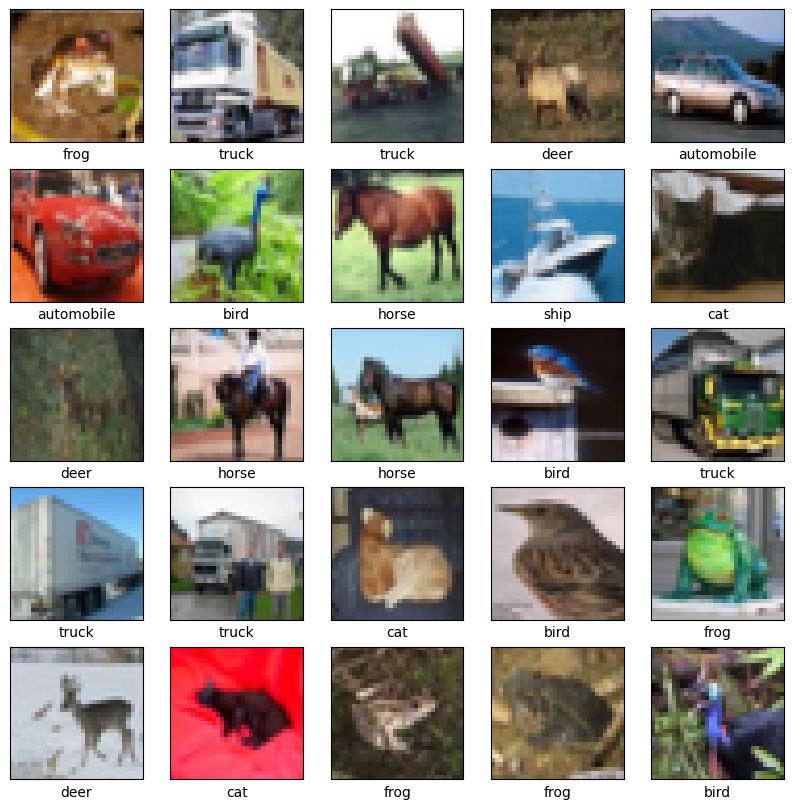

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


2023-12-12 13:46:25.991368: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-12 13:46:26.019339: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-12 13:46:26.019556: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [7]:
nn_optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=nn_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=16,epochs=8, 
                    validation_data=(test_images, test_labels))


Epoch 1/8
3125/3125 [==============================] - 18s 5ms/step - loss: 2.3485 - accuracy: 0.1000 - val_loss: 2.3079 - val_accuracy: 0.1000
Epoch 2/8
3125/3125 [==============================] - 18s 6ms/step - loss: 2.3121 - accuracy: 0.1001 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 3/8
3125/3125 [==============================] - 17s 5ms/step - loss: 2.3124 - accuracy: 0.0994 - val_loss: 2.3099 - val_accuracy: 0.1000
Epoch 4/8
 563/3125 [====>.........................] - ETA: 15s - loss: 2.3124 - accuracy: 0.0961

KeyboardInterrupt: 

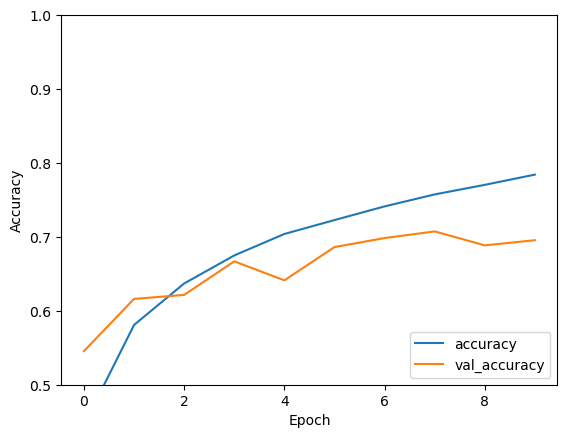

313/313 - 0s - loss: 0.9222 - accuracy: 0.6955 - 393ms/epoch - 1ms/step


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In [1]:
import numpy as np

In [2]:
import secrets

In [4]:
qwer = secrets.randbits(128)
qwer

282480260490486428412526399154423987415

In [10]:
rng1 = np.random.default_rng(qwer)
rng1.random()

0.7175948320020783

In [11]:
rng2 = np.random.default_rng(qwer)
rng2.random()

0.7175948320020783

In [12]:
k = np.array([0, 1, 2, 3, 4])

array([4, 1, 2, 0, 3])

In [14]:
k = np.array([0, 1, 2, 3, 4])

In [42]:
k = np.array([0, 1, 2, 3, 4])
l = np.array([0, 1, 2, 3, 4])

rng1 = np.random.default_rng(qwer+1)
rng1.shuffle(k)

rng2 = np.random.default_rng(qwer+1)
rng2.shuffle(l)

k == l
k

array([1, 0, 2, 4, 3])

In [1]:
len(test_images)

NameError: name 'test_images' is not defined